In [179]:
import seaborn as sns
import pandas as pd

In [180]:
train_data = pd.read_csv('cleaned_train.csv')
test_data = pd.read_csv('cleaned_test.csv')

In [181]:
y = train_data['Transported'].astype(int)
x = train_data.drop(['Transported'], axis=1)
x_test = test_data

In [182]:
train_data.head().T

,0,1,2,3,4
CryoSleep,0.0,0.0,0.0,0.0,0.0
Age,39.0,24.0,58.0,33.0,16.0
VIP,0.0,0.0,1.0,0.0,0.0
RoomService,0.0,109.0,43.0,0.0,303.0
FoodCourt,0.0,9.0,3576.0,1283.0,70.0
ShoppingMall,0.0,25.0,0.0,371.0,151.0
Spa,0.0,549.0,6715.0,3329.0,565.0
VRDeck,0.0,44.0,49.0,193.0,2.0
Transported,0.0,1.0,0.0,0.0,1.0
Group,1.0,2.0,3.0,3.0,4.0


In [183]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

'\nfrom sklearn.preprocessing import MinMaxScaler\n\nscaler = MinMaxScaler()\nx = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)\nx_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)'

In [184]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.1,random_state=42)

In [185]:
from tensorflow import keras
from tensorflow.keras import layers

In [186]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=[27]),
    layers.Dense(units=54, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(units=27, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(units=1, activation='sigmoid')
])

In [187]:
model.compile(optimizer='Adam', loss="binary_crossentropy", metrics=["binary_accuracy"])

In [188]:
early_stopping = keras.callbacks.EarlyStopping(patience=5, min_delta=0.001, restore_best_weights=True)

In [189]:
history = model.fit(
    x_train,y_train,
    validation_data=(x_val,y_val),
    epochs=200,
    batch_size=256,
    callbacks=early_stopping
)

Epoch 1/200


ValueError: in user code:

    File "C:\Users\anike\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\anike\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\anike\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\anike\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\anike\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\anike\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_10" is incompatible with the layer: expected shape=(None, 27), found shape=(None, 16)


<AxesSubplot: title={'center': 'Accuracy'}>

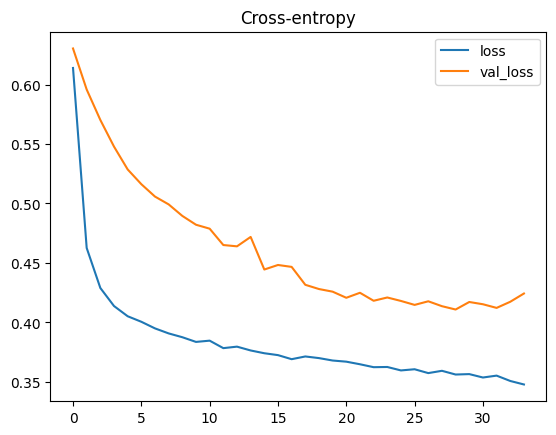

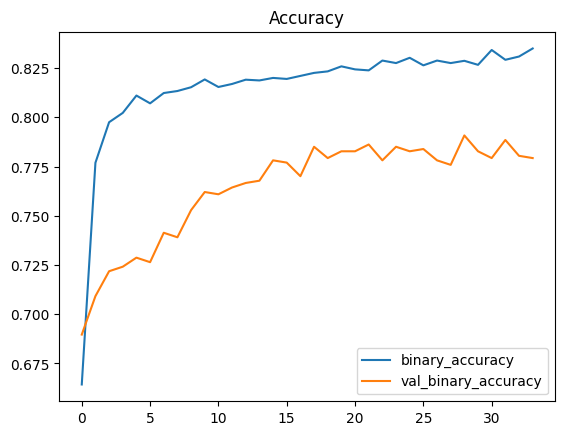

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [ ]:
result = model.predict(x_test)

134/134 [==============================] - 0s 1ms/step


<AxesSubplot: ylabel='Count'>

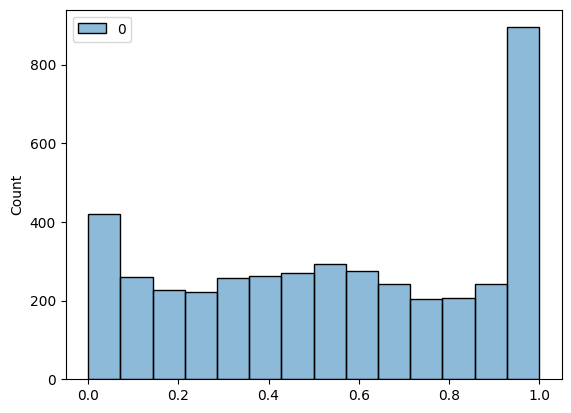

In [ ]:
sns.histplot(result)

In [ ]:
df = pd.DataFrame(result, index=test_data.index)
df.isna().sum()

0    0
dtype: int64

In [ ]:
new_result = []
for value in result:
    if value>=0.5:
        new_result.append('True')
    else:
        new_result.append('False')

In [ ]:
test_data = pd.read_csv('test.csv')
df = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Transported': new_result})
df.to_csv('submission.csv',index=False)